## Контекст
Набор данных включает данные нескольких датчиков, собранных с синхронного двигателя с постоянными магнитами (PMSM), установленного на испытательном стенде. PMSM представляет собой прототип немецкой OEM-модели. Измерения испытательного стенда были собраны отделом LEA Падерборнского университета.

## Содержание
Все записи дискретизируются с частотой 2 Гц (т.е. 1 ряд в 2 секунды). Набор данных состоит из нескольких сеансов измерений, которые можно отличить друг от друга по столбцу «profile_id». Сеанс измерения может длиться от одного до шести часов.

Двигатель приводится в действие разработанными вручную циклами движения, обозначающими  скорость двигателя и крутящий момент.

Токи в d/q-координатах (столбцы «id» и «iq») и напряжения в d/q-координатах (столбцы «ud» и «uq») являются результатом стандартной стратегии управления, пытающейся следовать эталонной скорости и крутящему моменту.
Столбцы «motor_speed» и «torque» представляют собой результирующие величины, достигнутые этой стратегией, полученные из заданных токов и напряжений.

Большинство управляемых циклов обозначают случайные блуждания в плоскости скорость-крутящий момент, чтобы более точно имитировать циклы реального мира.


## Вдохновение
Наиболее интересными целевыми характеристиками являются температура ротора ("pm"), температура статора ("stator_") и крутящий момент ("torque").

В частности, температура ротора и крутящий момент не могут быть надежно и экономически измерены в коммерческом транспортном средстве.

Возможность иметь надежные средства оценки температуры ротора помогает автомобильной промышленности производить двигатели с меньшим количеством материалов и позволяет  управлять двигателем максимально эфективно.
Точная оценка крутящего момента приводит к более точному и адекватному управлению двигателем, снижению потерь мощности и, в конечном итоге, накоплению тепла.

## Примечания

1. profile_id это номер сессии испытаний. т.е. в датасете несколько испытаний и у них есть айдишник, 1 испытание может идти до 6 часов. каждя запись это показатели через 2 секунды от предыдущей. 
2. Значения в данных это отклонения от эталонных.

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
df = pd.read_csv('measures_v2.csv')
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


**1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков. Постройте pairplot**

In [3]:
round(df.describe(),2)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00,1330816.00
mean,54.28,36.23,66.34,-25.13,56.88,2202.08,-68.72,37.41,58.51,48.19,24.57,31.11,40.79
std,44.17,21.79,28.67,63.09,22.95,1859.66,64.93,92.18,19.00,19.99,1.93,77.14,25.05
min,-25.29,10.62,18.59,-131.53,18.13,-275.55,-278.00,-293.43,20.86,18.08,8.78,-246.47,2.00
25%,12.07,18.70,42.79,-78.69,38.42,317.11,-115.41,1.10,43.15,31.99,23.18,-0.14,17.00
50%,48.94,26.90,65.11,-7.43,56.04,1999.98,-51.09,15.77,60.27,45.63,24.80,10.86,43.00
75%,90.03,49.86,88.14,1.47,75.59,3760.64,-2.98,100.61,72.01,61.46,26.22,91.60,65.00
max,133.04,101.60,141.36,131.47,111.95,6000.02,0.05,301.71,113.61,101.15,30.71,261.01,81.00


In [4]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [5]:
df.shape

(1330816, 13)

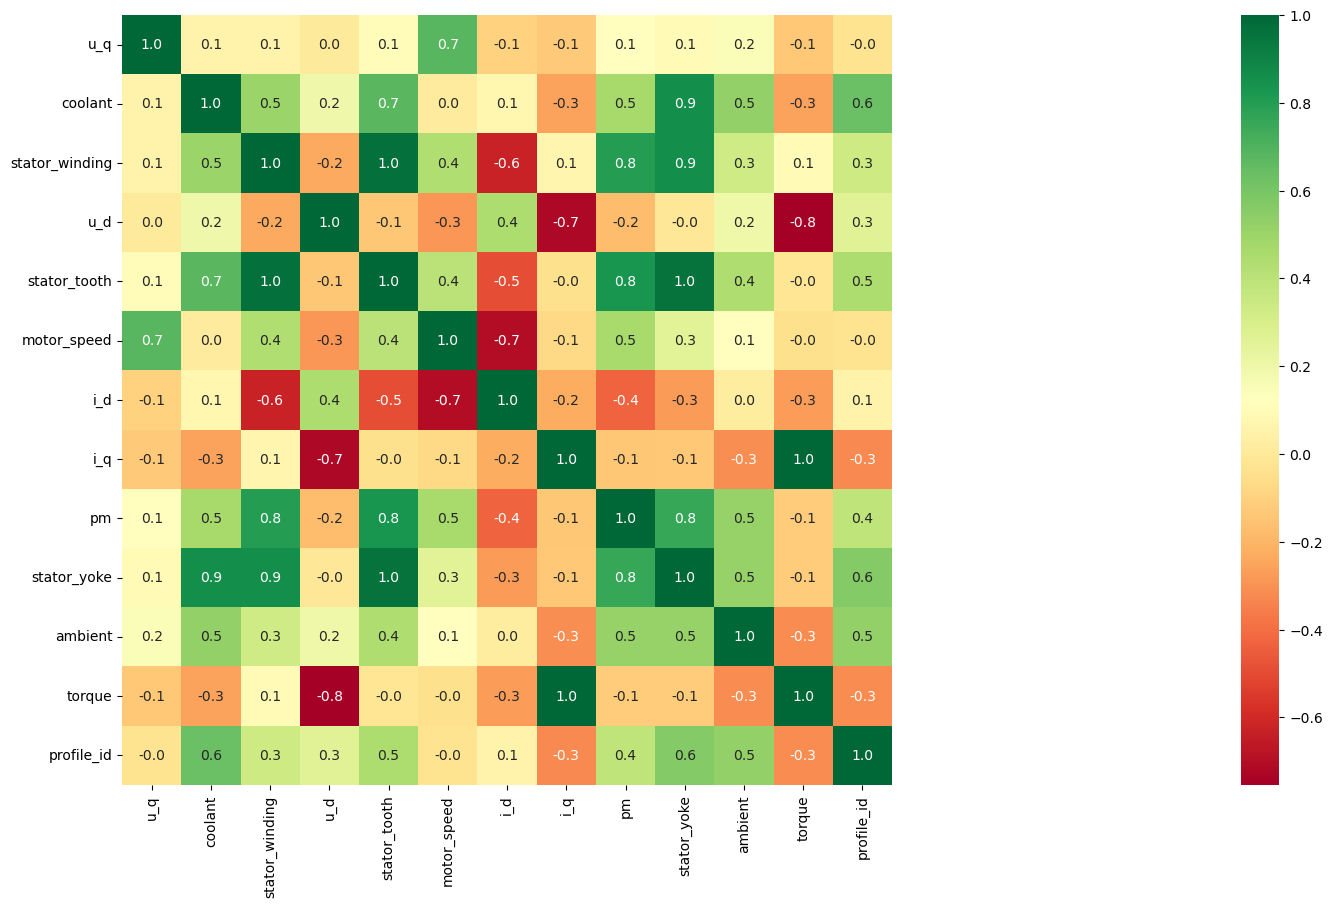

In [6]:
plt.figure(figsize=(90,10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.1f', cmap = "RdYlGn")
fig = plt.gcf()

plt.show()

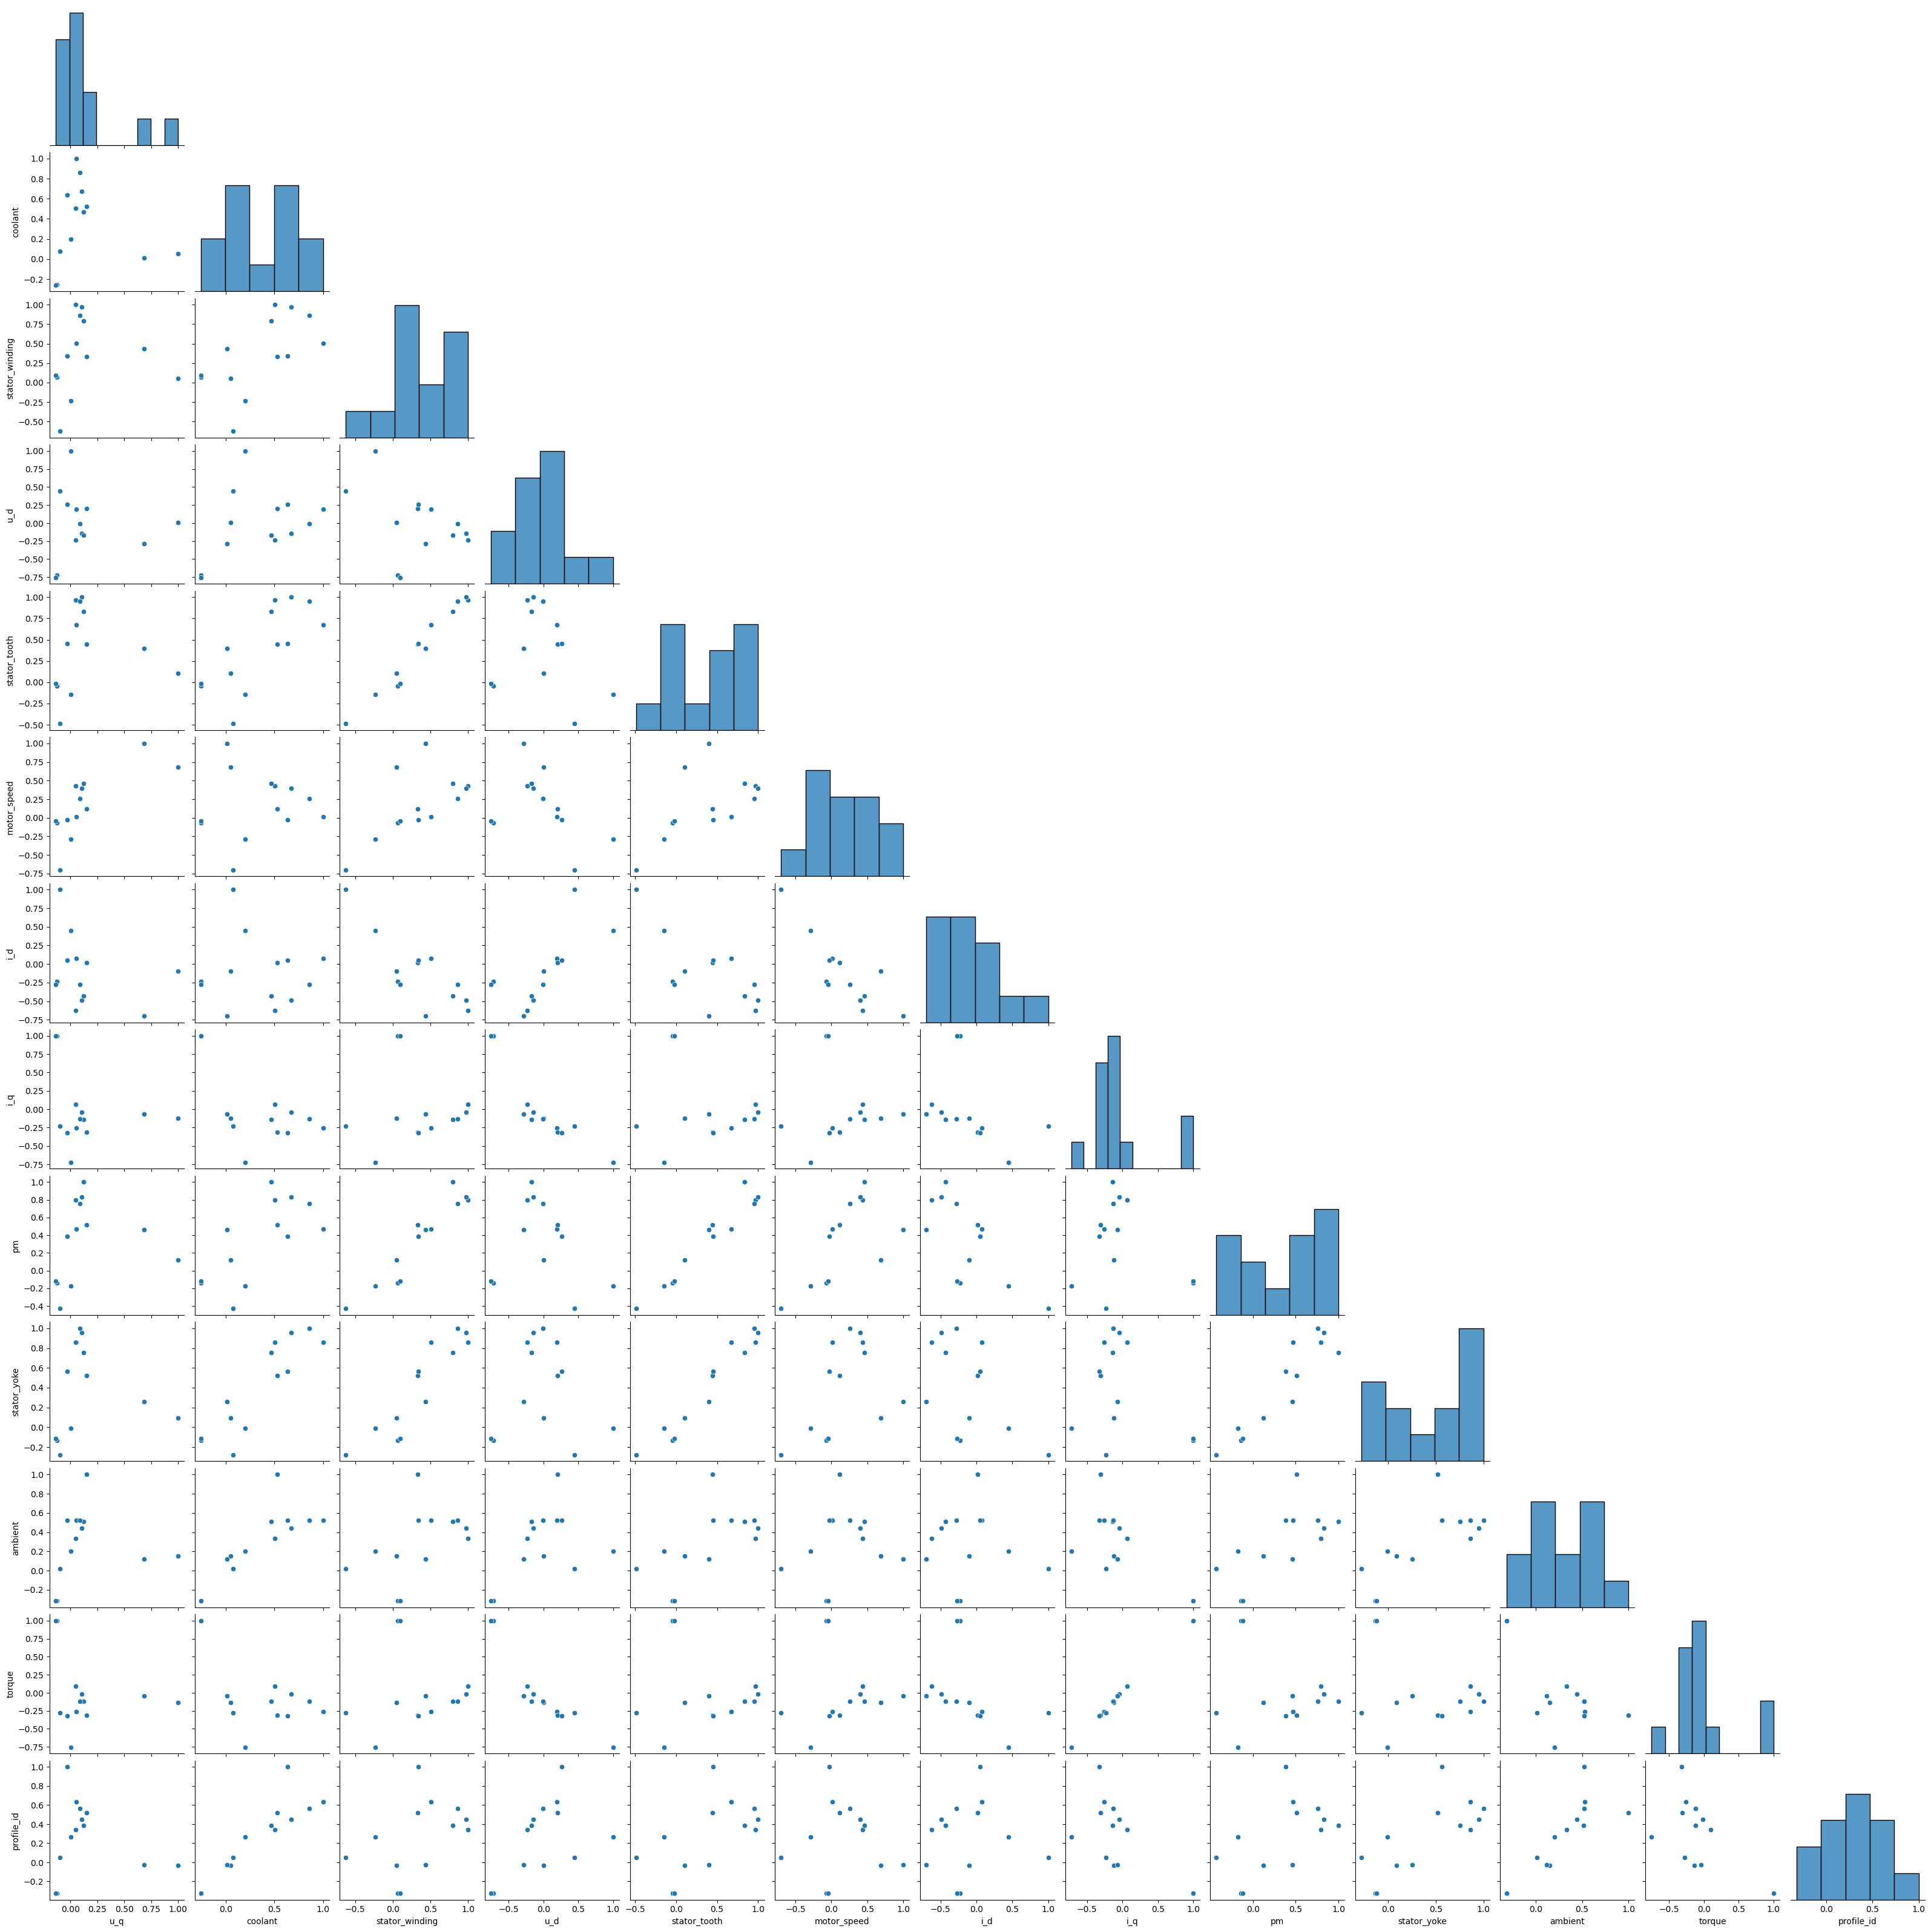

In [7]:
sns.pairplot(df.corr(), corner=True)

**2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

В первую очередь задаем параметры X и y для дальнейшего обучения. Обучение будет для переменной motor_speed.

In [8]:
X = df.drop(['motor_speed'], axis = 1)
y = df['motor_speed']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

После того, как мы модель обучили, посмотрим на коэффициенты и свободный член регрессии. Эти данные нам потом пригодяться, для построения функций регрессии.

In [11]:
lr.coef_, lr.intercept_

(array([  21.95136566,   38.19170503,  -75.0339177 ,   -4.41872264,
         195.67861419,  -18.73145718,    3.91870611,   12.56384582,
        -162.37360492,  -48.84869791,   -9.67450486,   -1.71470343]),
 590.3296339298872)

Тепереь посмотрим на сколько хорошо работает наша модель по метрикам MAE и MSE.

In [12]:
y_train_predicted = lr.predict(X_train)

y_test_predicted = lr.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(341.6661812554542, 342.15765839736486)

In [14]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(218030.39262709406, 219165.85590426836)

Прекрасно! Расхождение на тестовой и обучающей выборке небольшое, это говорит скорее о стабильности. Если смотреть усредненное значение 'motor_speed', которое около 2202, то можно сделать вывод MAE = 342, в целом, не плохой результат.

Теперь проведем кроссвалидацию по 5 фолдам.

In [15]:
from sklearn. model_selection import KFold
from sklearn. model_selection import cross_val_score

In [16]:

cv = KFold(n_splits = 5 , random_state = 1 , shuffle = True )

scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error',
 cv=cv)

np.mean(np.abs(scores))

341.8329528956744

Отлично, результат не улетел. Что еще больше убеждает в стабильности модели.

Теперь провизуализируем полученный результат. Так как я не придумала еще как изобразить 13ти мерное пространство, то построим парочку 3D моделей линейных зависимостей с разными категориями. Для начала построим по stator_yoke и torque.

In [17]:
X_train['stator_yoke'].min(), X_train['stator_yoke'].max()

(18.07668876647949, 101.14796436478986)

In [18]:
X_train['torque'].min(), X_train['torque'].max()

(-246.45107026356425, 261.0057067871094)

In [19]:
def func_lin1(x1, x2):
    return lr.coef_[9]*x1 + lr.coef_[11]*x2 + lr.intercept_

In [20]:
%matplotlib notebook

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_points = X_train['stator_yoke']
y_points = X_train['torque']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

x, y1 = np.meshgrid(range(15, 115), range(-250, 270));
z = np.array([func_lin1(point_x, point_y) for point_x, point_y in zip(x, y1)]);
ax.plot_surface(x, y1, z, alpha=0.2);

ax.set_xlabel('stator_yoke');
ax.set_ylabel('torque');
ax.set_zlabel('motor_speed');

plt.show()

<IPython.core.display.Javascript object>

Что ж по графику видно, что чем больше крутящий момент и ниже stator_yoke, увеличивается скорость мотора. 

Теперь построим по stator_tooth и pm.

In [21]:
X_train['stator_tooth'].min(), X_train['stator_tooth'].max()

(18.133975982666016, 111.94642341392526)

In [22]:
X_train['pm'].min(), X_train['pm'].max()

(20.856956481933597, 113.60015869140624)

In [23]:
def func_lin2(x1, x2):
    return lr.coef_[4]*x1 + lr.coef_[8]*x2 + lr.intercept_

In [24]:
%matplotlib notebook

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_points = X_train['stator_tooth']
y_points = X_train['pm']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

x, y1 = np.meshgrid(range(15, 115), range(20, 115));
z = np.array([func_lin2(point_x, point_y) for point_x, point_y in zip(x, y1)]);
ax.plot_surface(x, y1, z, alpha=0.2);

ax.set_xlabel('stator_tooth');
ax.set_ylabel('pm');
ax.set_zlabel('motor_speed');

plt.show()

<IPython.core.display.Javascript object>

Посмотрев на графики, можно убедиться, что линейная регресия вполне убедительно справляется с задачей описания наших точек.

**3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

Так как данные уже разделены, можем сразу переходить к обучению.

In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

In [26]:
knn.fit(X_train, y_train)
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

После обучение надо обязательно посмотреть MAE и MSE.

In [27]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_squared_error(y_train_predicted_knn, y_train)

(9.718856582352737, 738.5461568762263)

In [28]:
mean_absolute_error(y_test_predicted_knn, y_test), mean_squared_error(y_test_predicted_knn, y_test)

(12.649524756253788, 1271.8683388953273)

Ого! Результат поинетереснее, чем у линейной регрессии...Проверим на кросс валидации.

In [29]:
cv = KFold(n_splits = 5 , random_state = 1 , shuffle = True )

scores = cross_val_score(knn, X, y, scoring='neg_mean_absolute_error',
 cv=cv)

np.mean(np.abs(scores))

12.571210350193642

И тут такой же результат. Видимо модель KNN больше подходит. Но сейчас посмотрим, что у нас получится на графике...

In [30]:
%matplotlib notebook

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_points = X_train['stator_tooth']
y_points = X_train['pm']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

# x, y = np.meshgrid(range(15, 115), range(20, 115));
# z = np.array([func_lin2(point_x, point_y) for point_x, point_y in zip(x, y)]);
# ax.plot_surface(x, y, z, alpha=0.2);

ax.scatter(x_points, y_points, y_train_predicted_knn)

ax.set_xlabel('stator_tooth');
ax.set_ylabel('pm');
ax.set_zlabel('motor_speed');

plt.show()

<IPython.core.display.Javascript object>

**4. Сгенерируйте новые признаки:**
- Нормализация вектора тока. (корень квадратный из сумм квадратов токов)
- Нормализация вектора напряжения. (корень квадратный из сумм квадратов напряжения)
- Полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения)
- Эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

In [31]:
df['current_vector'] = np.sqrt(df.i_d**2+df.i_q**2)
df['voltage_vector'] = np.sqrt(df.u_d**2+df.u_q**2)
df['full_power'] = df.current_vector*df.voltage_vector
df['effective_power'] = df.i_d*df.u_d+df.i_q*df.u_q

df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,current_vector,voltage_vector,full_power,effective_power
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,0.004431,0.570659,0.002529,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,0.000992,0.446789,0.000443,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,0.001346,0.577165,0.000777,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,0.002046,0.454893,0.000931,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,0.074292,0.576530,0.042832,0.003852


**5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.**

In [32]:
X = df.drop(['motor_speed'], axis = 1)
y = df['motor_speed']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr.coef_, lr.intercept_

(array([ 2.79731938e+01,  2.43803590e+01, -2.24142200e+01, -1.08026057e+00,
         9.15811949e+01, -3.00437236e+01,  2.14248859e+01,  7.03588359e+00,
        -9.50562928e+01, -1.61698228e+01, -2.99185462e+01, -2.13958132e+00,
        -9.24180940e+00, -7.45355539e+00,  8.99874478e-03,  1.59065402e-02]),
 192.08172975697107)

In [36]:
y_train_predicted = lr.predict(X_train)

y_test_predicted = lr.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(235.67310541737473, 235.85508717718696)

In [38]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(109336.52713241377, 109326.54724198654)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)



KNeighborsRegressor()

In [40]:
# y_train_predicted_knn2 = knn.predict(X_train)

# y_test_predicted_knn2 = knn.predict(X_test)

In [41]:
# mean_absolute_error(y_train_predicted_knn2, y_train), mean_squared_error(y_train_predicted_knn2, y_train)

In [42]:
# mean_absolute_error(y_test_predicted_knn2, y_test), mean_squared_error(y_test_predicted_knn2, y_test)

In [43]:
from sklearn. model_selection import KFold
from sklearn. model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits = 5 , random_state = 1 , shuffle = True )

scores = cross_val_score(knn, X, y, scoring='neg_mean_absolute_error',
 cv=cv)

np.mean(np.abs(scores))